In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

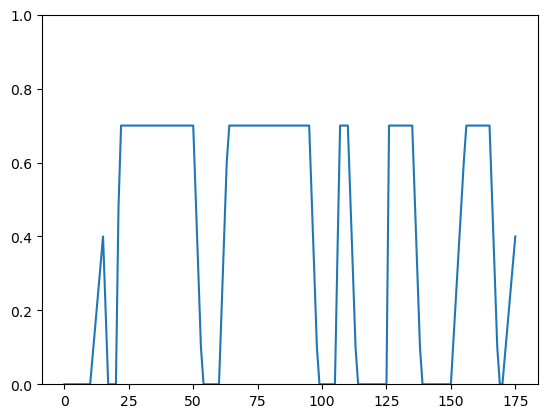

In [18]:
df = pd.read_csv('Voice_Transcription/word_counts.csv')
word_counts = df['Word_Count_Per_Second'].to_numpy()
suspicious_word = [0]
for i in word_counts :
    if(i >= 0.4) :
        suspicious_word.append(round(min(0.7, i/5 + suspicious_word[-1]), 2))
    else :
        suspicious_word.append(round(max(0, suspicious_word[-1] - .2), 2))
        
# print(suspicious_word)
# print(len(suspicious_word))
plt.plot(suspicious_word)
plt.ylim(0,1)
plt.show

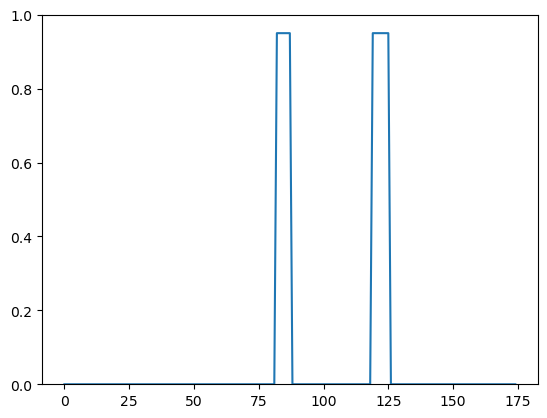

In [19]:
df = pd.read_csv('Multiple_Person_Phone_Detection/MPPD.csv')

df['count'] = df['count'].apply(eval)
df['person'] = df['count'].apply(lambda x: x.get('person', 0))
df['cell phone'] = df['count'].apply(lambda x: x.get('cell phone', 0))

df.drop(columns=['count'], inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.set_index('timestamp', inplace=True)
max_counts_per_second = df.resample('S').agg({
    'person': 'max',
    'cell phone': 'max'
})
max_counts_per_second.fillna(0, inplace=True)

max_counts_per_second['person'] = max_counts_per_second['person'].astype(int)
max_counts_per_second['cell phone'] = max_counts_per_second['cell phone'].astype(int)

max_counts_per_second.reset_index(inplace=True)

suspicious_person = []
suspicious_phone = []
for i in max_counts_per_second['person'] :
    if(i != 1) :
        suspicious_person.append(.95)
    else :
        suspicious_person.append(0)


for i in max_counts_per_second['cell phone'] :
    if(i != 0) :
        suspicious_phone.append(.95)
    else :
        suspicious_phone.append(0)

plt.plot(suspicious_phone)
plt.ylim(0,1)
plt.show()



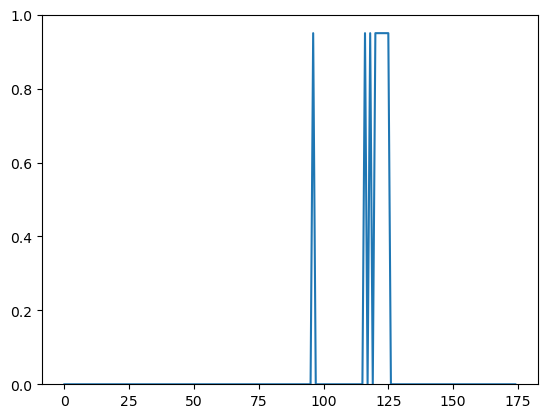

In [20]:
plt.plot(suspicious_person)
plt.ylim(0,1)
plt.show()

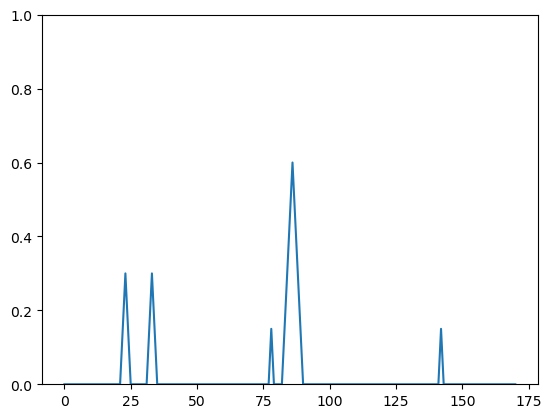

In [21]:
df2 = pd.read_csv('Face_Recognition/verification_results.csv')
face = df2['Detection Confidence'].to_numpy()
# face = df2.iloc[:, 0].to_numpy()
suspicious_face = [0]
for i in face :
    if i != 1 :
        suspicious_face.append(min(1, suspicious_face[-1] + .15))
    else :
        suspicious_face.append(max(0, suspicious_face[-1] - .15))

plt.plot(suspicious_face)
plt.ylim(0,1)
plt.show()


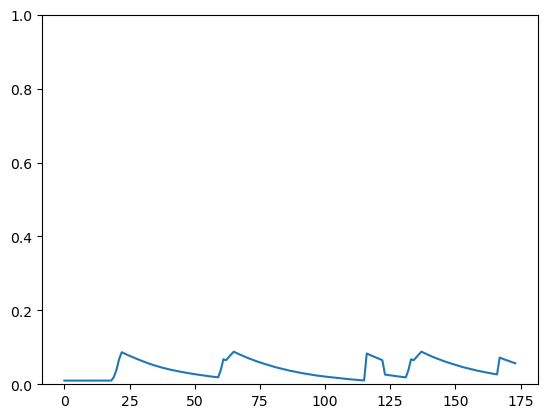

In [22]:
df3 = pd.read_csv('Exam_proctoring_video/verification_results.csv')
suspicious_head_movement = df3.iloc[:, 0].to_list()
plt.plot(suspicious_head_movement)
plt.ylim(0,1)
plt.show()




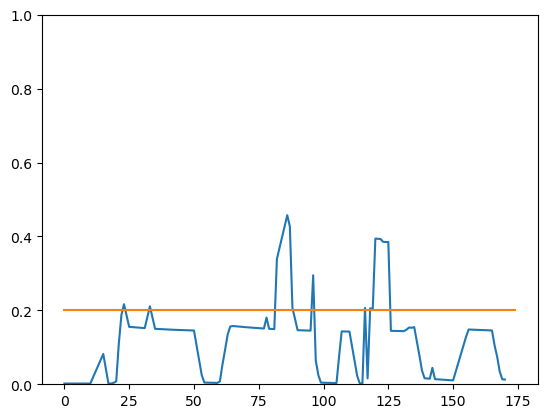

Suspicious activity threshold crossed for 19 seconds
It is greater than 4 % of the total time so it is highly probable that the candidate was cheating


In [26]:
final_suspicious = []
count = 0
for i in range(min(min(len(suspicious_word),len(suspicious_phone)), min(len(suspicious_person),min(len(suspicious_head_movement),len(suspicious_face))))) :
    final_suspicious.append((suspicious_face[i] + suspicious_head_movement[i] + suspicious_person[i] + suspicious_phone[i] + suspicious_word[i])/5.0)
    if final_suspicious[-1] > 0.2 :
        count = count + 1
plt.plot(final_suspicious)
plt.plot([0,174],[0.2, 0.2])
plt.ylim(0,1)
plt.show()
print(f'Suspicious activity threshold crossed for {count} seconds')
if count > len(final_suspicious)/25 :
    print('It is greater than 4 % of the total time so it is highly probable that the candidate was cheating')
else :
    print('It is less than 4 % of the total time so it is highly probable that the candidate was not cheating')
